In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
df = pd.read_csv("./clean_user.csv")
dist_matrix = np.genfromtxt('./100131001-100131002—T5EU.csv', delimiter=',')

In [2]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,review_count,average_stars,votes,years_yelped,num_friends
0,2,4.50,0,8,223
1,16,4.69,4,8,0
2,3,1.67,1,4,56
3,5,2.00,5,13,0
4,11,4.17,6,9,81


In [3]:
cluster_model = SpectralClustering(n_clusters=3, affinity='precomputed')
cluster_model.fit_predict(dist_matrix)
df['label'] = cluster_model.labels_

In [4]:
print(df.groupby(['label']).size())

label
0    193
1      5
2      2
dtype: int64


In [5]:
features = df.drop(columns=['label'])
label = df['label']
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.4, random_state=42)

decision_tree = tree.DecisionTreeClassifier()
train = decision_tree.fit(x_train, y_train)
score = train.score(x_test, y_test)

print(score)

0.9375


[Text(0.6363636363636364, 0.9285714285714286, 'X[0] <= 1.5\ngini = 0.049\nsamples = 120\nvalue = [117, 2, 1]'),
 Text(0.5454545454545454, 0.7857142857142857, 'X[4] <= 1.0\ngini = 0.218\nsamples = 25\nvalue = [22, 2, 1]'),
 Text(0.45454545454545453, 0.6428571428571429, 'X[1] <= 4.0\ngini = 0.304\nsamples = 17\nvalue = [14, 2, 1]'),
 Text(0.2727272727272727, 0.5, 'X[3] <= 5.0\ngini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.18181818181818182, 0.35714285714285715, 'X[3] <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.09090909090909091, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.21428571428571427, 'X[1] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.18181818181818182, 0.07142857142857142, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.36363636363636365, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.36363636363636365, 0.35714285714285715, 'gini = 0.0\nsamples =

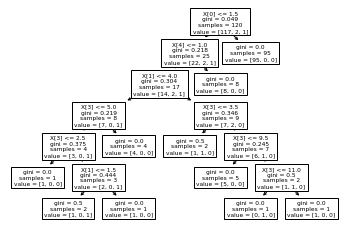

In [6]:
tree.plot_tree(train)

In [7]:
df.to_csv('./100131001-100131002—T6Data.csv', index=False)

Unused Code

In [8]:
def classify(stars):
    if stars > 4:
        return 2
    elif stars > 3: 
        return 1
    else:
        return 0